In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import simple_colors  as colors
plt.rcParams['figure.dpi'] = 200

In [2]:
def bold(text):
    return colors.green(text, ['bold'])

def bold_italic(text):
    return colors.green(text, ['bold', 'italic'])

---
# Problem Statement:
Analyze Netflix data to uncover insights that will guide the production of popular shows and movies, identify the most beloved actors in each country, determine preferred show types and genres, and develop strategies for effective business growth.

---

In [3]:
netflix_data = pd.read_csv(r'/content/netflix.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix_data.shape

(8807, 12)

In [5]:
netflix_data.drop(['description'], axis=1, inplace=True) # removing description
netflix_data.shape

(8807, 11)

In [6]:
netflix_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 6.9 MB


In [7]:
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
netflix_data.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies"
freq,1,6131,1,19,19,2818,109,3207,1793,362


In [9]:
netflix_data.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [10]:
netflix_data.isnull().sum() # directors has majaority nulls while cast and country has equal nulls

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [11]:
# msno.matrix(df, color=(0.1, 0.2, 0.6))

In [12]:
# msno.bar(df, color=(1.0, 0.5, 0.31))

In [13]:
for column in netflix_data.columns:
    null_rate = netflix_data[column].isna().sum() * 100 / netflix_data.shape[0]
    if null_rate > 0:
        print(f"The column {bold(column)} has a null rate of {bold_italic(str(round(null_rate, 2))+'%')}")

The column director has a null rate of 29.91%
The column cast has a null rate of 9.37%
The column country has a null rate of 9.44%
The column date_added has a null rate of 0.11%
The column rating has a null rate of 0.05%
The column duration has a null rate of 0.03%


In [14]:
# Replacments

netflix_data['country'] = netflix_data['country'].fillna(netflix_data['country'].mode()[0])


netflix_data['cast'].replace(np.nan, 'Not Available',inplace  = True)
netflix_data['director'].replace(np.nan, 'Not Available',inplace  = True)

print(netflix_data.shape)

(8807, 11)


In [15]:
netflix_data.isna().sum() # There are still nulls in date_added, rating and duration.

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,4
duration,3


In [16]:
netflix_data.isna().sum().sum() #sum of nulls in the whole table

17

In [17]:
# Dealing with Duration column
display(netflix_data.groupby('type')['duration'].count()) # Duration is Season for 'TV Show' and in minutes for 'Movies

# Nulls in duration
null_row_count = netflix_data['duration'].isna().sum()
print(f"Nulls in Duration: {null_row_count}")

,duration
type,
Movie,6128
TV Show,2676


Nulls in Duration: 3


In [18]:
display(netflix_data[netflix_data['duration'].isna()][['show_id','type','rating','duration']]) # The values of duration is misplaced in ratings column

,show_id,type,rating,duration
5541,s5542,Movie,74 min,NaN
5794,s5795,Movie,84 min,NaN
5813,s5814,Movie,66 min,NaN


In [19]:
# Swapping rating and duration for the 3 records above
mask = netflix_data['duration'].isna()
netflix_data.loc[mask,'duration'] = netflix_data.loc[mask,'rating']
netflix_data.loc[mask,'rating'] = np.NaN

netflix_data['duration'].isna().sum() # replaced the 3 null values of duration with rating

0

In [20]:
netflix_data['type'] = netflix_data['type'].astype('category')

netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [21]:
netflix_data.info(memory_usage='deep') # This is still partially pre-processed. As we do further analysis, we do more pre-processing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      8807 non-null   object  
 4   cast          8807 non-null   object  
 5   country       8807 non-null   object  
 6   date_added    8797 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8800 non-null   object  
 9   duration      8807 non-null   object  
 10  listed_in     8807 non-null   object  
dtypes: category(1), int64(1), object(9)
memory usage: 6.5 MB


# Netflix Content Analysis

In [22]:
content_type_ratios = netflix_data['type'].value_counts(normalize=True).round(2).to_frame().T
content_type_ratios

type,Movie,TV Show
proportion,0.7,0.3


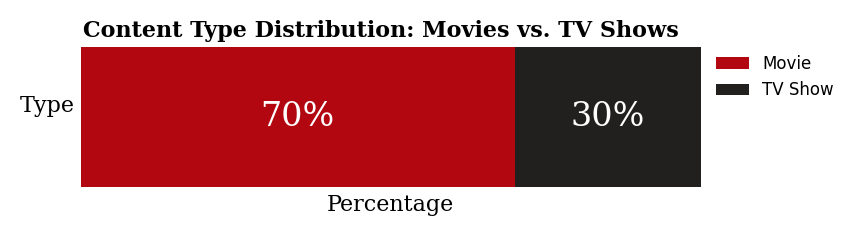

In [23]:
fig, ax = plt.subplots(1,1,figsize=(4,1))

ax.barh(content_type_ratios.index, content_type_ratios['Movie'], color='#b20710', label='Movie')
ax.barh(content_type_ratios.index, content_type_ratios['TV Show'], left=content_type_ratios['Movie'], color='#221f1f', label='TV Show')
ax.set_xlim(0,1)
# Annotate the bar for 'Movie'
movie_ratio = str(int(content_type_ratios['Movie'].iloc[0] * 100)) + '%'
ax.annotate(movie_ratio,
            xy=(content_type_ratios['Movie'].iloc[0] /2, 0),  # x and y coordinates
            ha='center', va='center', color='white', fontfamily='serif',fontsize=12)

tv_show_ratio = str(int(content_type_ratios['TV Show'].iloc[0] * 100)) + '%'
ax.annotate(tv_show_ratio,
            xy=(content_type_ratios['Movie'].iloc[0] + content_type_ratios['TV Show'].iloc[0]/2, 0),  # x and y coordinates
            ha='center', va='center', color='white', fontfamily='serif',fontsize=12)

ax.set_ylabel('Type', fontfamily='serif',fontsize=8, rotation=0, labelpad=12)
ax.set_xlabel('Percentage', fontfamily='serif',fontsize=8, labelpad=0)

ax.set_xticks([])
ax.set_yticks([])
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

plt.suptitle('Content Type Distribution: Movies vs. TV Shows', fontfamily='serif',fontsize=8, fontweight='bold')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=6, frameon=False)

plt.show()




---


### Insights:
We observe a substantial majority of movies in the dataset, comprising 70% of the total content, while TV shows represent only 30%.


---



<ipython-input-24-c8e072f230df>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  netflix_season = netflix_data.groupby('type')[['duration']].value_counts(normalize=True,sort=True, ascending=False)['TV Show'].iloc[:5].to_frame().T


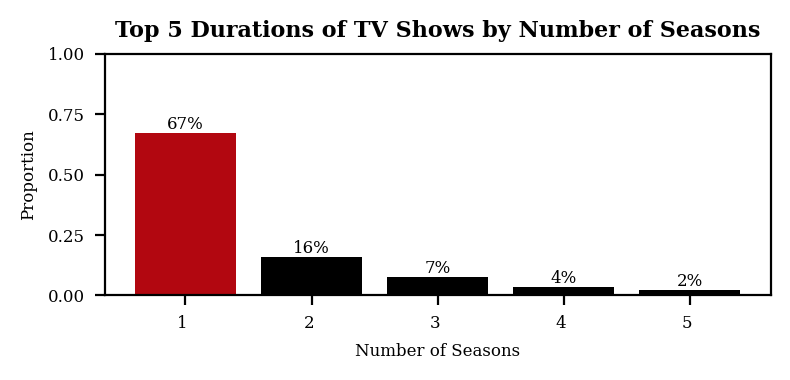

In [24]:
netflix_season = netflix_data.groupby('type')[['duration']].value_counts(normalize=True,sort=True, ascending=False)['TV Show'].iloc[:5].to_frame().T


# Create a bar plot
plt.figure(figsize=(4, 2))

# Set colors: Red for the first bar and Black for the rest
colors = ['#b20710'] + ['#000000'] * (len(netflix_season.columns) - 1)  # First bar red, others black

bars = plt.bar(netflix_season.columns, netflix_season.values.flatten(), color=colors)
plt.ylim(0, 1)  # Set the y-axis limits to 0 and 1
plt.yticks(fontsize=6, fontfamily='serif')
# Set x-ticks to match the number of seasons with formatting
plt.xticks(range(len(netflix_season.columns)),
           netflix_season.columns.str.lstrip().str.replace('Seasons','').str.replace('Season',''),
           fontsize=6, fontfamily='serif')  # Set x-tick positions, labels, and font properties

plt.xlabel('Number of Seasons', fontsize=6, fontfamily='serif')  # Set x-axis label
plt.ylabel('Proportion', fontsize=6, fontfamily='serif')  # Set y-axis label

# Display counts on top of bars
for bar in bars:
    yval = bar.get_height()  # Get the height of each bar (count)
    plt.annotate(f'{int((yval*100).round())}%',  # Use int() to display the count as a whole number
                 xy=(bar.get_x() + bar.get_width() / 2, yval),  # Position above the bar
                 ha='center', va='bottom', fontsize=6, color='black', fontfamily='serif')  # Adjust text properties


# Add title with font properties
plt.title('Top 5 Durations of TV Shows by Number of Seasons', fontsize=8, fontfamily='serif', fontweight='bold')

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


In [25]:
netflix_minutes = netflix_data[netflix_data['type'] == 'Movie'][['show_id','duration']].set_index('show_id')

netflix_minutes['duration (in mins)'] = netflix_minutes['duration'].str.extract('(\d+)').astype(int)
netflix_minutes.drop('duration', axis=1, inplace=True)

netflix_minutes_summary = netflix_minutes.describe().T
netflix_minutes_summary

,count,mean,std,min,25%,50%,75%,max
duration (in mins),6131.0,99.564998,28.289504,3.0,87.0,98.0,114.0,312.0


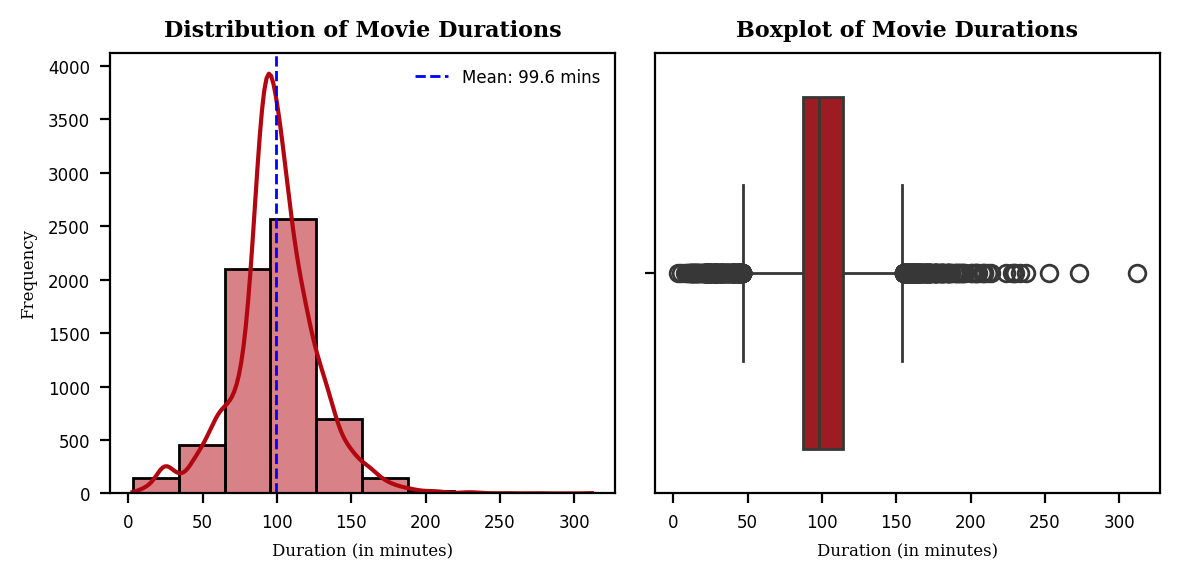

In [26]:
bins = pd.cut(netflix_minutes['duration (in mins)'], 10)
# Plotting the histogram with seaborn
fig, ax = plt.subplots(1,2,figsize = (6,3))

# Histogram
sns.histplot(netflix_minutes['duration (in mins)'], bins=10, color='#b20710', kde=True, ax=ax[0])
mean = netflix_minutes['duration (in mins)'].mean()
ax[0].axvline(mean, color='blue', linestyle='--', linewidth=1, label=f'Mean: {mean:.1f} mins')
ax[0].legend(fontsize=6, frameon=False)
ax[0].set_title('Distribution of Movie Durations', fontsize=8, fontfamily='serif', fontweight='bold')
ax[0].set_xlabel('Duration (in minutes)', fontsize=6, fontfamily='serif')
ax[0].set_ylabel('Frequency', fontsize=6, fontfamily='serif')
ax[0].tick_params(axis='x', labelsize=6)
ax[0].tick_params(axis='y', labelsize=6)

# Boxplot
sns.boxplot(x=netflix_minutes['duration (in mins)'], ax=ax[1], color='#b20710')
ax[1].set_title('Boxplot of Movie Durations', fontsize=8, fontfamily='serif', fontweight='bold')
ax[1].set_xlabel('Duration (in minutes)', fontsize=6, fontfamily='serif')


ax[1].tick_params(axis='x', labelsize=6)
ax[1].tick_params(axis='y', labelsize=6)

plt.tight_layout()  # Adjust layout to fit everything
plt.show()

---
## Insights
The analysis shows that the shortest movie in the dataset lasts 3 minutes, while the longest extends to 312 minutes. However, the bulk of the data is concentrated around the mean duration of 99.6, suggesting a preference for films that fit within this typical viewing time.

---

# Netflix - Monthly Release Trends Analysis

In [27]:

# Check for null values in the date_added column
print("Number of null values in 'date_added':", netflix_data['date_added'].isna().sum())  # We have 10 nulls

# Dropping the rows with null values in 'date_added'
netflix_content_with_date = netflix_data[['type', 'date_added']].dropna()

# Convert 'date_added' to datetime format
netflix_content_with_date['date_added'] = pd.to_datetime(netflix_content_with_date['date_added'], format='mixed')

# Extract month and year from the 'date_added'
netflix_content_with_date['month_added'] = netflix_content_with_date['date_added'].dt.month_name().astype('category')
netflix_content_with_date['year_added'] = netflix_content_with_date['date_added'].dt.year
netflix_content_with_date.drop('date_added', axis=1, inplace=True)
netflix_content_with_date.info(memory_usage='deep') # converted month_added to categorial variable

Number of null values in 'date_added': 10
<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   type         8797 non-null   category
 1   month_added  8797 non-null   category
 2   year_added   8797 non-null   int32   
dtypes: category(2), int32(1)
memory usage: 121.5 KB


In [28]:
netflix_content_with_date.describe()
# We have netflix data from 2008 to 2021

,year_added
count,8797.000000
mean,2018.871888
std,1.574243
min,2008.000000
25%,2018.000000
50%,2019.000000
75%,2020.000000
max,2021.000000


In [29]:
# setting month order
netflix_date_added = netflix_content_with_date[['year_added','month_added']]
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
netflix_date_added = netflix_date_added.groupby('year_added')['month_added'].value_counts().unstack().fillna(0)[month_order].T
netflix_date_added.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 12 entries, December to January
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2008    12 non-null     int64
 1   2009    12 non-null     int64
 2   2010    12 non-null     int64
 3   2011    12 non-null     int64
 4   2012    12 non-null     int64
 5   2013    12 non-null     int64
 6   2014    12 non-null     int64
 7   2015    12 non-null     int64
 8   2016    12 non-null     int64
 9   2017    12 non-null     int64
 10  2018    12 non-null     int64
 11  2019    12 non-null     int64
 12  2020    12 non-null     int64
 13  2021    12 non-null     int64
dtypes: int64(14)
memory usage: 1.7 KB


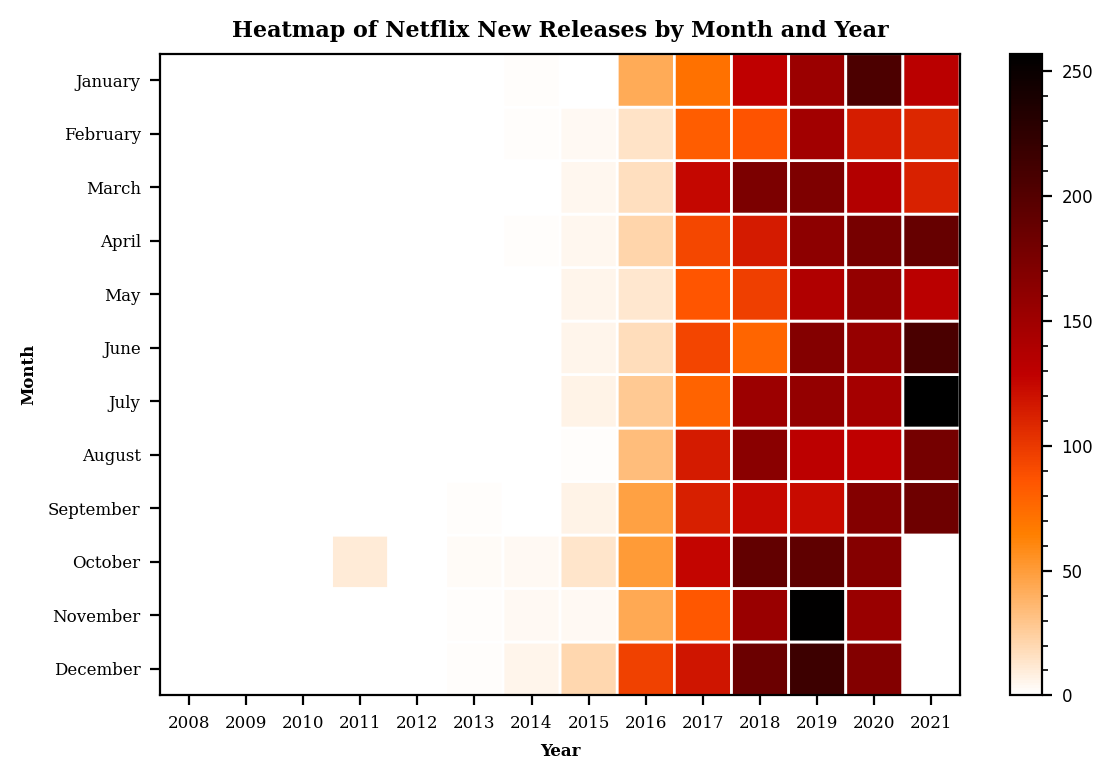

In [30]:
plt.figure(figsize=(6,4))
plt.pcolor(netflix_date_added, cmap='gist_heat_r', edgecolors='white', linewidth=1) # heatmap


plt.xticks(np.arange(0.5, len(netflix_date_added.columns), 1), netflix_date_added.columns, fontsize=6, fontfamily='serif')
plt.yticks(np.arange(0.5, len(netflix_date_added.index), 1), netflix_date_added.index, fontsize=6, fontfamily='serif')

plt.title('Heatmap of Netflix New Releases by Month and Year', fontsize=8, fontfamily='serif', fontweight='bold')
plt.xlabel('Year', fontsize=6, fontfamily='serif', fontweight='bold')
plt.ylabel('Month', fontsize=6, fontfamily='serif', fontweight='bold')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=6)
cbar.ax.minorticks_on()
plt.tight_layout()
plt.show()


---
## Insights:
There are two high-traffic periods for content releases: **October to December** and **June to July**. These months are highly competitive due to the large volume of new releases. To maximize visibility, it's advisable to avoid these busy months. Instead, the best times to release content are **February, May** when there's less competition.

---

In [31]:
count_data = netflix_content_with_date.groupby(['type'])['year_added'].value_counts().unstack().fillna(0).T
count_data.head()

<ipython-input-31-9fa9d7ed4a46>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = netflix_content_with_date.groupby(['type'])['year_added'].value_counts().unstack().fillna(0).T


type,Movie,TV Show
year_added,,
2008,1,1
2009,2,0
2010,1,0
2011,13,0
2012,3,0


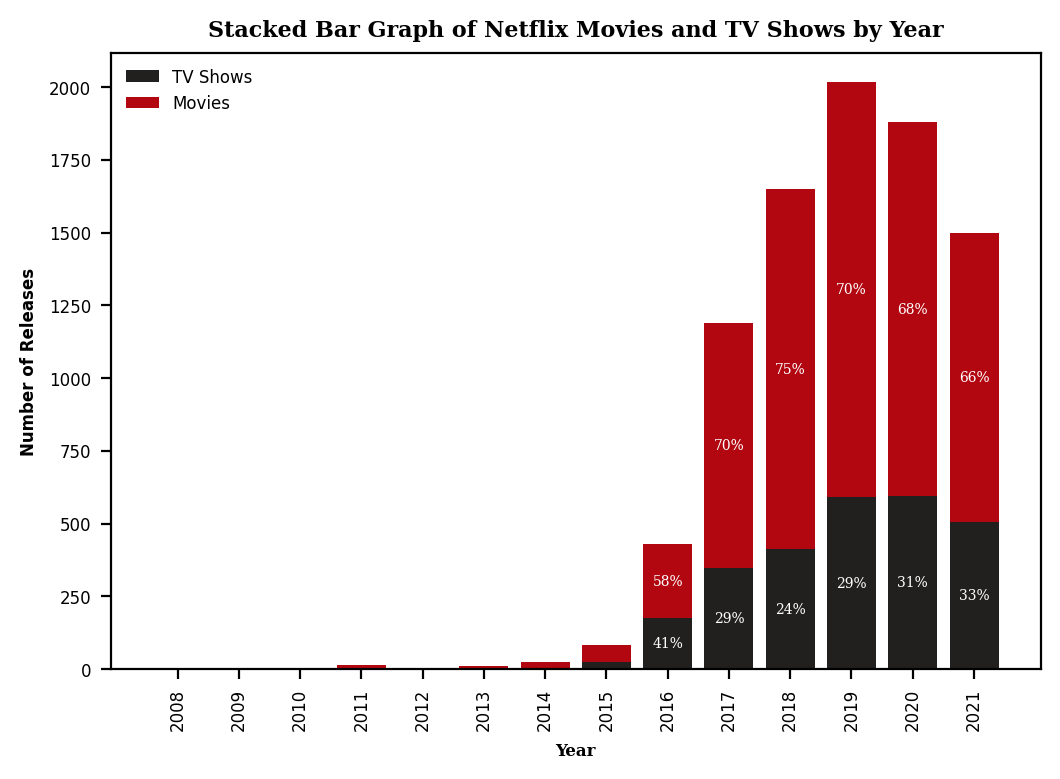

In [32]:
# Plotting the stacked bar graph
fig, ax = plt.subplots(figsize=(6,4))

# Plotting the bars for Movies and TV Shows
tv_show_bars = ax.bar(count_data.index, count_data['TV Show'], color='#221f1f', label='TV Shows')
movie_bars = ax.bar(count_data.index, count_data['Movie'],bottom=count_data['TV Show'], color='#b20710', label='Movies')

total_count_by_year = count_data.sum(axis=1).values

for i, bar in enumerate(movie_bars):
  if bar.get_height() > 250:
    y_height = bar.get_height()
    ax.annotate(f'{int(y_height/total_count_by_year[i] * 100)}%', xy=(bar.get_x() + bar.get_width() / 2, tv_show_bars[i].get_height() + (y_height / 2)), ha='center', va='center', fontsize=5, color='white', fontfamily='serif')

for i, bar in enumerate(tv_show_bars):
  if bar.get_height() > 150:
    y_height = bar.get_height()
    ax.annotate(f'{int(y_height/total_count_by_year[i] * 100)}%', xy=(bar.get_x() + bar.get_width() / 2, y_height / 2), ha='center', va='center', fontsize=5, color='white', fontfamily='serif')
# Customizing the plot
ax.set_title('Stacked Bar Graph of Netflix Movies and TV Shows by Year', fontsize=8, fontweight='bold', fontfamily='serif')
ax.set_xlabel('Year', fontsize=6, fontfamily='serif',fontweight='bold')
ax.set_ylabel('Number of Releases', fontsize=6, fontweight='bold')
ax.legend(loc='upper left', frameon=False, fontsize=6)
# Use tick_params to set font properties for ticks
ax.set_xticks(count_data.index)
ax.tick_params(axis='x', labelsize=6, rotation = 90)
ax.tick_params(axis='y', labelsize=6)

# Show the plot
plt.show()

---
# Insights:
The peak global content volume for Netflix occurred in 2019, indicating a significant expansion during that year.  This surge can be largely attributed to the COVID-19 pandemic, which restricted access to theaters. Moreover, it seems that Netflix has prioritized the growth of its movie library over its TV show offerings, with a notably more dramatic increase in the number of movies compared to TV shows.

In recent years, Netflix has shifted its focus more towards TV shows, as evidenced by a steady increase in TV show counts since 2019. In contrast, there has been a consistent decline in the total number of movie releases.



---

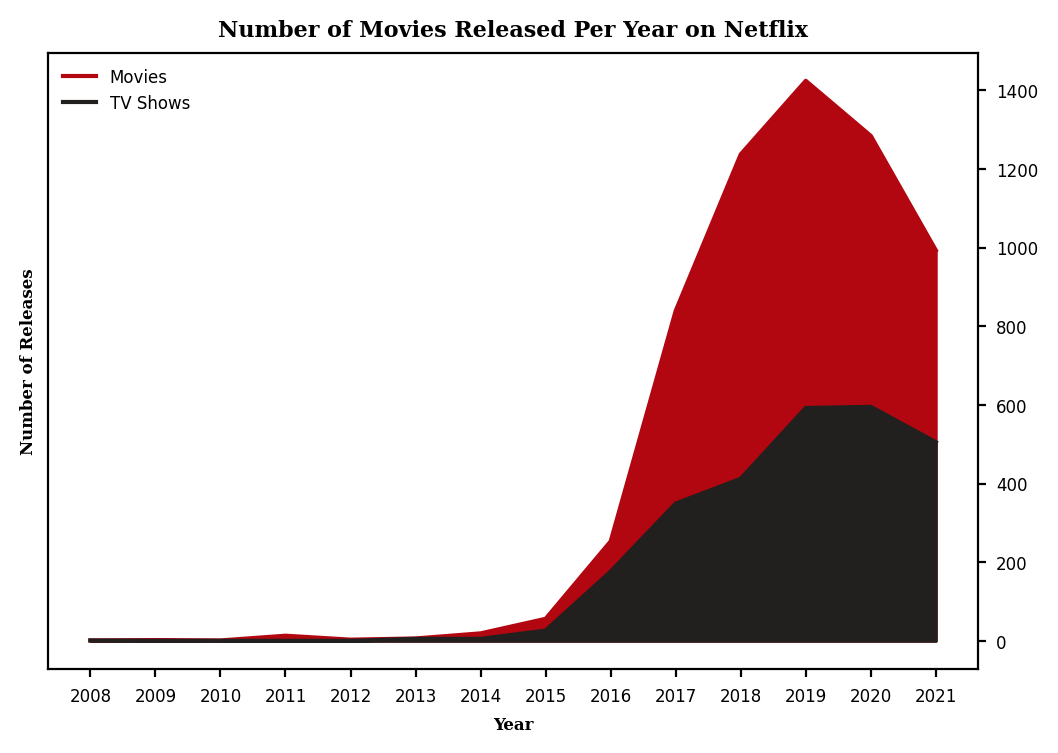

In [33]:
# Plotting the line graphs
fig, ax = plt.subplots(figsize=(6,4))

ax.plot(count_data.index, count_data['Movie'], label='Movies', color='#b20710')
ax.plot(count_data.index, count_data['TV Show'], label='TV Shows', color='#221f1f')

# Filling the area under the line plots
ax.fill_between(count_data.index, count_data['Movie'], color='#b20710')
ax.fill_between(count_data.index, count_data['TV Show'], color='#221f1f')
# Customizing the plot
ax.set_title('Number of Movies Released Per Year on Netflix', fontsize=8, fontweight='bold', fontfamily='serif')
ax.set_xlabel('Year', fontsize=6, fontfamily='serif', fontweight='bold')
ax.set_ylabel('Number of Releases', fontsize=6, fontfamily='serif', fontweight='bold')
ax.legend(frameon=False, fontsize=6)

ax.yaxis.tick_right()
ax.tick_params(axis='x', labelsize=6, length= 3)  # Rotate x-axis labels for better readability
ax.tick_params(axis='y', labelsize=6, length= 3)

plt.xticks(np.arange(count_data.index.min(), count_data.index.max() + 1,1))

plt.show()

In [34]:
count_date_by_month = netflix_content_with_date.groupby(['type'])['month_added'].value_counts().unstack().fillna(0).T
count_date_by_month = count_date_by_month.loc[month_order[::-1]]
count_date_by_month.head()

<ipython-input-34-6a644c33c3f4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_date_by_month = netflix_content_with_date.groupby(['type'])['month_added'].value_counts().unstack().fillna(0).T


type,Movie,TV Show
month_added,,
January,546,192
February,382,181
March,529,213
April,550,214
May,439,193


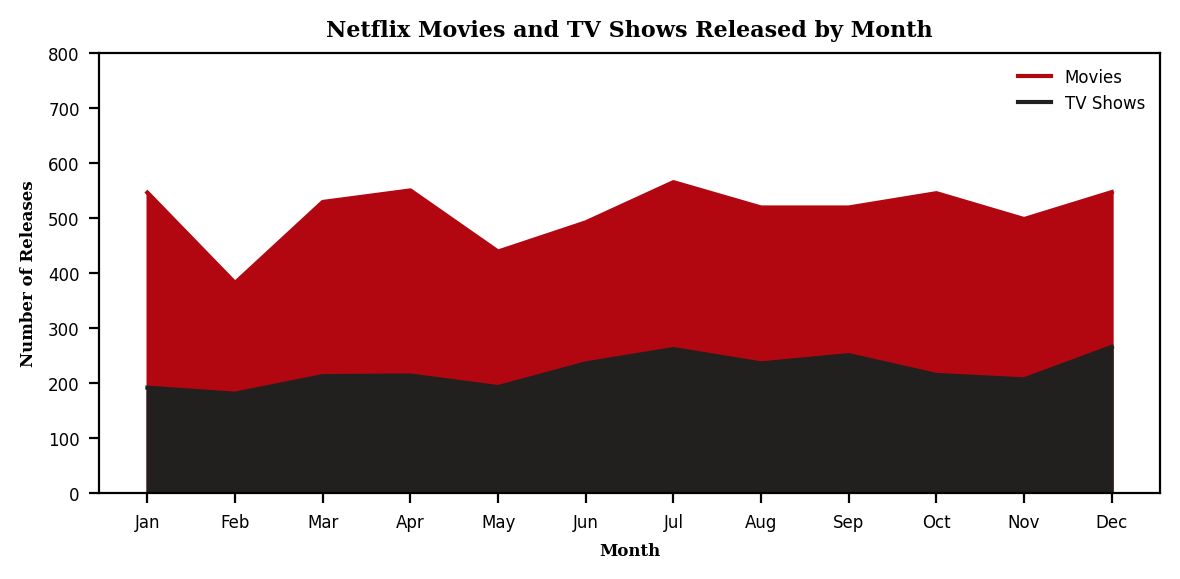

In [35]:
# Plotting the line graphs
fig, ax = plt.subplots(figsize=(6,3))

short_month_index = count_date_by_month.index.astype(str).str[:3]
# Plotting the Movies and TV Shows
ax.plot(short_month_index, count_date_by_month['Movie'], label='Movies', color='#b20710')
ax.plot(short_month_index, count_date_by_month['TV Show'], label='TV Shows', color='#221f1f')

# Filling the area under the line plots
ax.fill_between(short_month_index, count_date_by_month['Movie'], color='#b20710')
ax.fill_between(short_month_index, count_date_by_month['TV Show'], color='#221f1f')
# Customizing the plot
ax.set_title('Netflix Movies and TV Shows Released by Month', fontsize=8, fontweight='bold', fontfamily='serif')
ax.set_xlabel('Month', fontsize=6, fontfamily='serif', fontweight='bold')
ax.set_ylabel('Number of Releases', fontsize=6, fontfamily='serif', fontweight='bold')
ax.legend(frameon=False, fontsize=6)
ax.set_ylim(0,800)
ax.tick_params(axis='x', labelsize=6)  # Rotate x-axis labels for better readability
ax.tick_params(axis='y', labelsize=6)

plt.tight_layout()
plt.show()

---
## Insights:
The number of movies peaked in both January and December. In contrast, the number of TV shows saw a spike only in December, while it decreased in January. Therefore, it would be advantageous to release TV shows in January, February, and November. For movies, the ideal release months are February, May, and August.

---

# Preprocessing Director and Cast columns

In [36]:

# Create the netflix_actors DataFrame
netflix_actors = netflix_data[['show_id', 'cast']].set_index('show_id').astype('category')

# Count occurrences of 'Not Available' in the 'cast' column
not_available_actors_count = netflix_actors[netflix_actors['cast'] == 'Not Available'].count()
print(f"Number of 'Not Available' values in 'cast': {not_available_actors_count['cast']}")

Number of 'Not Available' values in 'cast': 825


In [37]:
# Drop rows where 'cast' is 'Not Available'
netflix_actors = netflix_actors[netflix_actors['cast'] != 'Not Available']
netflix_actors.describe() # Total rows before exploring

,cast
count,7982
unique,7692
top,David Attenborough
freq,19


In [38]:
netflix_actors = netflix_actors['cast'].str.split(',').explode().str.strip()
netflix_actors.describe() # The total count of rows or cast drastically increased

,cast
count,64126
unique,36439
top,Anupam Kher
freq,43


In [39]:
# Create the netflix_directors DataFrame
netflix_directors = netflix_data[['show_id', 'director']].set_index('show_id').astype('category')

# Count occurrences of 'Not Available' in the 'directors' column
not_available_directors_count = netflix_directors[netflix_directors['director'] == 'Not Available'].count()
print(f"Number of 'Not Available' values in 'directors': {not_available_directors_count['director']}")

Number of 'Not Available' values in 'directors': 2634


In [40]:
# Drop rows where 'directors' is 'Not Available'
netflix_directors = netflix_directors[netflix_directors['director'] != 'Not Available']

# Display statistics for the directors DataFrame
netflix_directors.describe()

,director
count,6173
unique,4528
top,Rajiv Chilaka
freq,19


In [41]:
# Explode the 'directors' column into individual rows
netflix_directors = netflix_directors['director'].str.split(',').explode().str.strip()

# Display statistics after exploding the directors
netflix_directors.describe() # The total count of rows for directors also increases


,director
count,6978
unique,4993
top,Rajiv Chilaka
freq,22


In [42]:
# Display the first few entries
display(netflix_directors.head())

# Get the count of each director
director_counts = netflix_directors.value_counts()
display(director_counts.head())

,director
show_id,
s1,Kirsten Johnson
s3,Julien Leclercq
s6,Mike Flanagan
s7,Robert Cullen
s7,José Luis Ucha


,count
director,
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Suhas Kadav,16
Marcus Raboy,16


In [43]:
# Merge the result with content type information
merged_directors_actors = pd.merge(netflix_data[['show_id', 'type']].set_index('show_id'), netflix_directors, on='show_id', how='inner')

# Merge directors and actors columns
final_netflix_data = pd.merge(merged_directors_actors, netflix_actors, on='show_id', how='inner')

final_netflix_data.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
Index: 51191 entries, s3 to s8807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   type      51191 non-null  category
 1   director  51191 non-null  object  
 2   cast      51191 non-null  object  
dtypes: category(1), object(2)
memory usage: 10.1 MB


In [44]:
final_netflix_data.describe()

,type,director,cast
count,51191,51191,51191
unique,2,4529,26725
top,Movie,Martin Scorsese,Anupam Kher
freq,48826,139,42


In [45]:
final_netflix_data.isna().sum()

,0
type,0
director,0
cast,0


In [46]:
final_netflix_data.rename(columns = {'director':'directors','cast':'actors'}, inplace=True)
final_netflix_data.head()

,type,directors,actors
show_id,,,
s3,TV Show,Julien Leclercq,Sami Bouajila
s3,TV Show,Julien Leclercq,Tracy Gotoas
s3,TV Show,Julien Leclercq,Samuel Jouy
s3,TV Show,Julien Leclercq,Nabiha Akkari
s3,TV Show,Julien Leclercq,Sofia Lesaffre


In [47]:
# Group by 'directors' and 'type', then count the occurrences
director_counts = final_netflix_data.groupby(['directors', 'type']).size().unstack(fill_value=0)

# Get the top 20 directors based on total content (movies and TV shows combined)
top_20_directors = director_counts.sum(axis=1).nlargest(20)

# Filter out the movie counts for these top 20 directors
top_20_movie_directors = director_counts.loc[top_20_directors.index, 'Movie']

# Display the top 20 movie directors
top_20_movie_directors.head()


<ipython-input-47-c2e02ddb79df>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  director_counts = final_netflix_data.groupby(['directors', 'type']).size().unstack(fill_value=0)


,Movie
directors,
Martin Scorsese,139
Rajiv Chilaka,136
Cathy Garcia-Molina,125
Steven Spielberg,121
Youssef Chahine,104


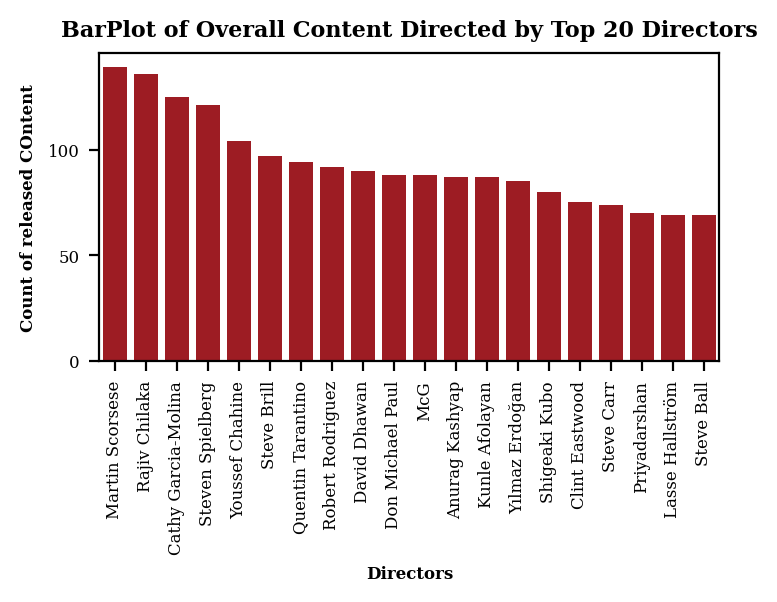

In [48]:
# BarPlot for Overall Content
plt.figure(figsize=(4,2))
sns.barplot(top_20_directors, color='#b20710')
plt.title('BarPlot of Overall Content Directed by Top 20 Directors', fontsize=8, fontweight='bold', fontfamily='serif')
plt.xlabel('Directors', fontsize=6, fontfamily='serif', fontweight='bold')
plt.ylabel('Count of released COntent', fontsize=6, fontfamily='serif', fontweight='bold')
plt.xticks(fontsize=6, fontfamily='serif', rotation=90)
plt.yticks(fontsize=6, fontfamily='serif')
# plt.tight_layout()
plt.show()

---
# Insights:
The top directors with highest count of both movies and tv shows are "Martin Scorsese", "Rajiv Chilaka", and "Cathy Varcia-Molina"

---

In [49]:

top_20_movie_directors = (
    final_netflix_data[final_netflix_data['type'] == 'Movie']  # Filter for movies only
    .groupby('directors')                                      # Group by directors
    .size()                                                    # Count the number of movies per director
    .nlargest(20)                                              # Get the top 20 directors
)

# Display the top 20 directors by movie count
top_20_movie_directors.head()

,0
directors,
Martin Scorsese,139
Rajiv Chilaka,136
Cathy Garcia-Molina,125
Steven Spielberg,121
Youssef Chahine,104


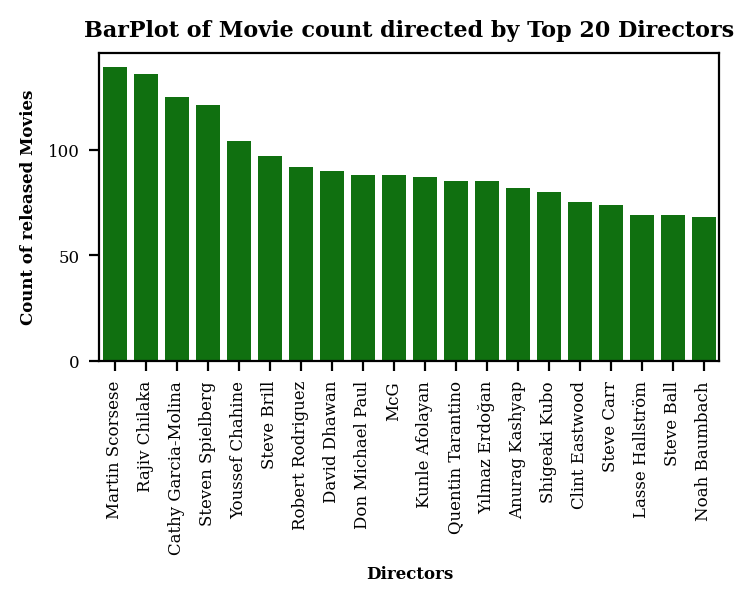

In [50]:
# BarPlot for movie Content
plt.figure(figsize=(4,2))
sns.barplot(top_20_movie_directors, color='green')
plt.title('BarPlot of Movie count directed by Top 20 Directors', fontsize=8, fontweight='bold', fontfamily='serif')
plt.xlabel('Directors', fontsize=6, fontfamily='serif', fontweight='bold')
plt.ylabel('Count of released Movies', fontsize=6, fontfamily='serif', fontweight='bold')
plt.xticks(fontsize=6, fontfamily='serif', rotation=90)
plt.yticks(fontsize=6, fontfamily='serif')
# plt.tight_layout()
plt.show()

---
# Insights:
The top directors with highest count movie content are "Martin Scorsese", "Rajiv Chilaka", and "Cathy Varcia-Molina"

---

In [51]:

top_20_tv_show_directors = (
    final_netflix_data[final_netflix_data['type'] == 'TV Show']  # Filter for movies only
    .groupby('directors')                                      # Group by directors
    .size()                                                    # Count the number of tv show per director
    .nlargest(20)                                              # Get the top 20 directors
)

# Display the top 20 directors by tv show count


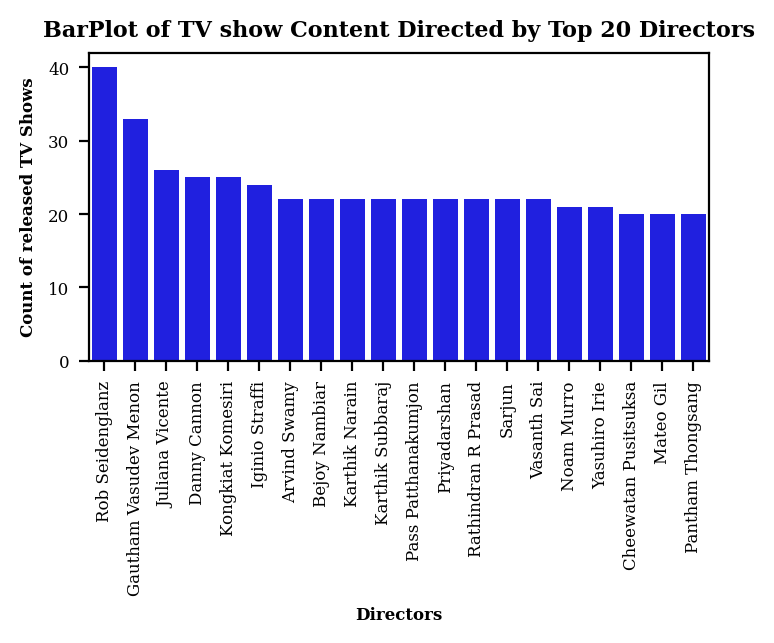

In [52]:
# BarPlot for TV show Content
plt.figure(figsize=(4,2))
sns.barplot(top_20_tv_show_directors, color='blue')
plt.title('BarPlot of TV show Content Directed by Top 20 Directors', fontsize=8, fontweight='bold', fontfamily='serif')
plt.xlabel('Directors', fontsize=6, fontfamily='serif', fontweight='bold')
plt.ylabel('Count of released TV Shows', fontsize=6, fontfamily='serif', fontweight='bold')
plt.xticks(fontsize=6, fontfamily='serif', rotation=90)
plt.yticks(fontsize=6, fontfamily='serif')
# plt.tight_layout()
plt.show()

---
# Insights:
The directors with the highest counts of TV show content are Rob Seidenglanz, Gautham Vasudev Menon, and Juilana Vicente. Notably, none of the top 20 TV show directors rank among the top for movie content. In other words, the leading creators of TV shows are not necessarily the same individuals who excel in directing movies.

---

In [53]:

top_20_movie_actors= (
    final_netflix_data[final_netflix_data['type'] == 'Movie']  # Filter for movies only
    .groupby('actors')                                      # Group by directors
    .size()                                                    # Count the number of movie per director
    .nlargest(20)                                              # Get the top 20 directors
)

top_20_movie_actors.head()

,0
actors,
Anupam Kher,42
James Franco,37
Shah Rukh Khan,35
Julie Tejwani,34
Naseeruddin Shah,34


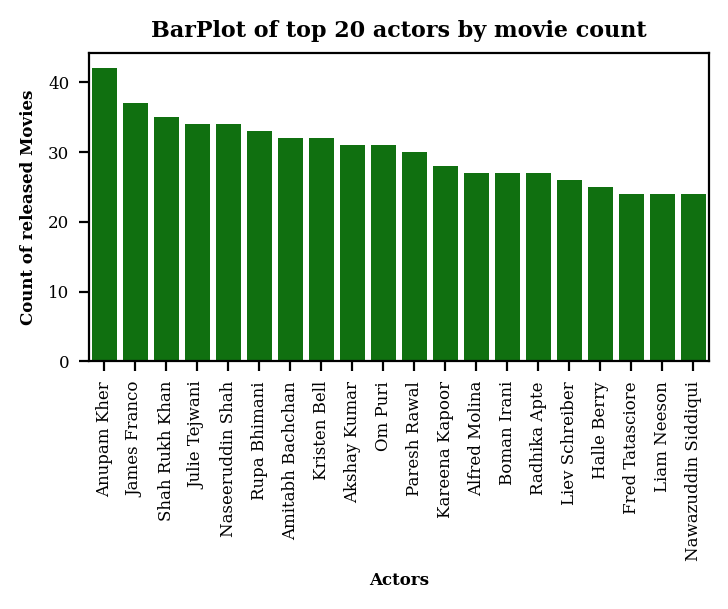

In [54]:
# BarPlot for movie Content
plt.figure(figsize=(4,2))
sns.barplot(top_20_movie_actors, color='green')
plt.title('BarPlot of top 20 actors by movie count', fontsize=8, fontweight='bold', fontfamily='serif')
plt.xlabel('Actors', fontsize=6, fontfamily='serif', fontweight='bold')
plt.ylabel('Count of released Movies', fontsize=6, fontfamily='serif', fontweight='bold')
plt.xticks(fontsize=6, fontfamily='serif', rotation=90)
plt.yticks(fontsize=6, fontfamily='serif')
# plt.tight_layout()
plt.show()

In [55]:

top_20_tv_show_actors= (
    final_netflix_data[final_netflix_data['type'] == 'TV Show']  # Filter for movies only
    .groupby('actors')                                      # Group by directors
    .size()                                                    # Count the number of tv show per director
    .nlargest(20)                                              # Get the top 20 directors
)

top_20_tv_show_actors.head()

,0
actors,
Anjali,13
Gautham Vasudev Menon,13
Prakash Raj,13
Hsia Teng-hung,10
River Huang,10


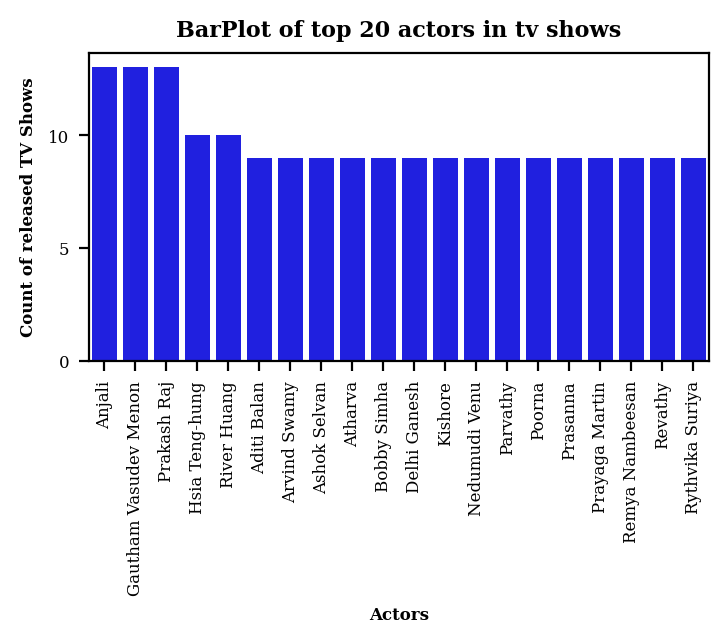

In [56]:
# BarPlot for TV show Content
plt.figure(figsize=(4,2))
sns.barplot(top_20_tv_show_actors, color='blue')
plt.title('BarPlot of top 20 actors in tv shows', fontsize=8, fontweight='bold', fontfamily='serif')
plt.xlabel('Actors', fontsize=6, fontfamily='serif', fontweight='bold')
plt.ylabel('Count of released TV Shows', fontsize=6, fontfamily='serif', fontweight='bold')
plt.xticks(fontsize=6, fontfamily='serif', rotation=90)
plt.yticks(fontsize=6, fontfamily='serif')
# plt.tight_layout()
plt.show()

In [57]:
top_20_movie_actors_ = top_20_movie_actors.index.values
top_20_movie_directors_ = top_20_movie_directors.index.values
top_actors_directors = final_netflix_data[final_netflix_data['actors'].isin(top_20_movie_actors_) & final_netflix_data['directors'].isin(top_20_movie_directors_)][['directors','actors']]

top_actors_directors = top_actors_directors.groupby('directors')['actors'].value_counts().reset_index()
top_actors_directors.head()

,directors,actors,count
0,Anurag Kashyap,Nawazuddin Siddiqui,3
1,Anurag Kashyap,Radhika Apte,2
2,Anurag Kashyap,Amitabh Bachchan,1
3,David Dhawan,Anupam Kher,6
4,David Dhawan,Paresh Rawal,1


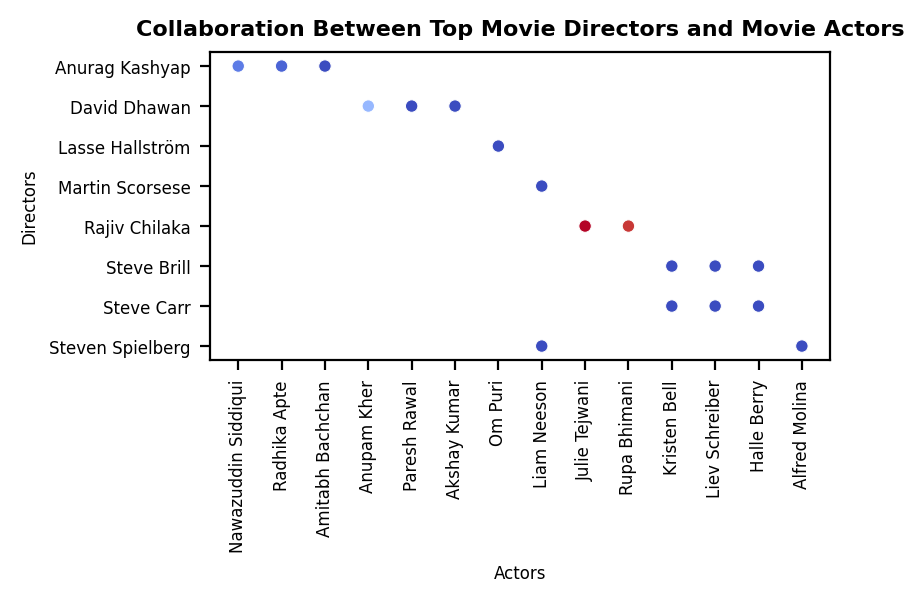

In [58]:
plt.figure(figsize=(4,2))
# Create a scatter plot
sns.scatterplot(data=top_actors_directors, x=top_actors_directors.actors, y=top_actors_directors.directors,size=top_actors_directors.count, sizes=(20, 500), hue='count', palette='coolwarm', legend=False)

plt.title('Collaboration Between Top Movie Directors and Movie Actors', fontsize=8, fontweight='bold')
plt.xlabel('Actors', fontsize=6)
plt.ylabel('Directors', fontsize=6)
plt.xticks(fontsize=6,rotation=90)
plt.yticks(fontsize=6,rotation=0)
# plt.tight_layout()
plt.show()

---
# Insights:
There is no significant collaboration of top movie actors and movie directors

---

In [59]:
top_20_tv_show_actors_ = top_20_tv_show_actors.index.values
top_20_tv_show_directors_ = top_20_tv_show_directors.index.values
top_actors_directors_tv_show = (final_netflix_data[final_netflix_data['actors'].isin(top_20_tv_show_actors)
                               & final_netflix_data['directors'].isin(top_20_tv_show_directors)]
                                [['directors','actors']])

In [60]:
top_actors_directors_tv_show = top_actors_directors_tv_show.groupby('directors')['actors'].value_counts().reset_index()
top_actors_directors_tv_show.info()
print()
print(f"No records present: {top_actors_directors_tv_show}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   directors  0 non-null      object
 1   actors     0 non-null      object
 2   count      0 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 124.0+ bytes

No records present: Empty DataFrame
Columns: [directors, actors, count]
Index: []


---
# Insights:

There is no collaboration of top tv show actors and tv show directors.

---

In [61]:
netflix_countries = netflix_data[['show_id', 'country']].set_index('show_id').astype('category')

In [62]:
netflix_countries = netflix_countries['country'].str.split(',').explode().str.strip()
netflix_countries = pd.merge(netflix_countries, netflix_data[['show_id', 'type']].set_index('show_id'), on='show_id', how='inner')
netflix_countries.describe()

,country,type
count,10850,10850
unique,123,2
top,United States,Movie
freq,4521,7819


In [63]:
netflix_countries.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 10850 entries, s1 to s8807
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   country  10850 non-null  object  
 1   type     10850 non-null  category
dtypes: category(1), object(1)
memory usage: 1.3 MB


In [64]:
netflix_countries.head()

,country,type
show_id,,
s1,United States,Movie
s2,South Africa,TV Show
s3,United States,TV Show
s4,United States,TV Show
s5,India,TV Show


In [65]:
netflix_countries.isna().sum() # No nulls

,0
country,0
type,0


In [66]:
netflix_countries = netflix_countries.value_counts().unstack().fillna(0)
netflix_countries['Total'] = netflix_countries['Movie'].astype(int) + netflix_countries['TV Show'].astype(int)
netflix_countries = netflix_countries.sort_values(by='Total', ascending=False).iloc[:10]
netflix_countries

type,Movie,TV Show,Total
country,,,
United States,3192.0,1329.0,4521
India,962.0,84.0,1046
United Kingdom,534.0,272.0,806
Canada,319.0,126.0,445
France,303.0,90.0,393
Japan,119.0,199.0,318
Spain,171.0,61.0,232
South Korea,61.0,170.0,231
Germany,182.0,44.0,226


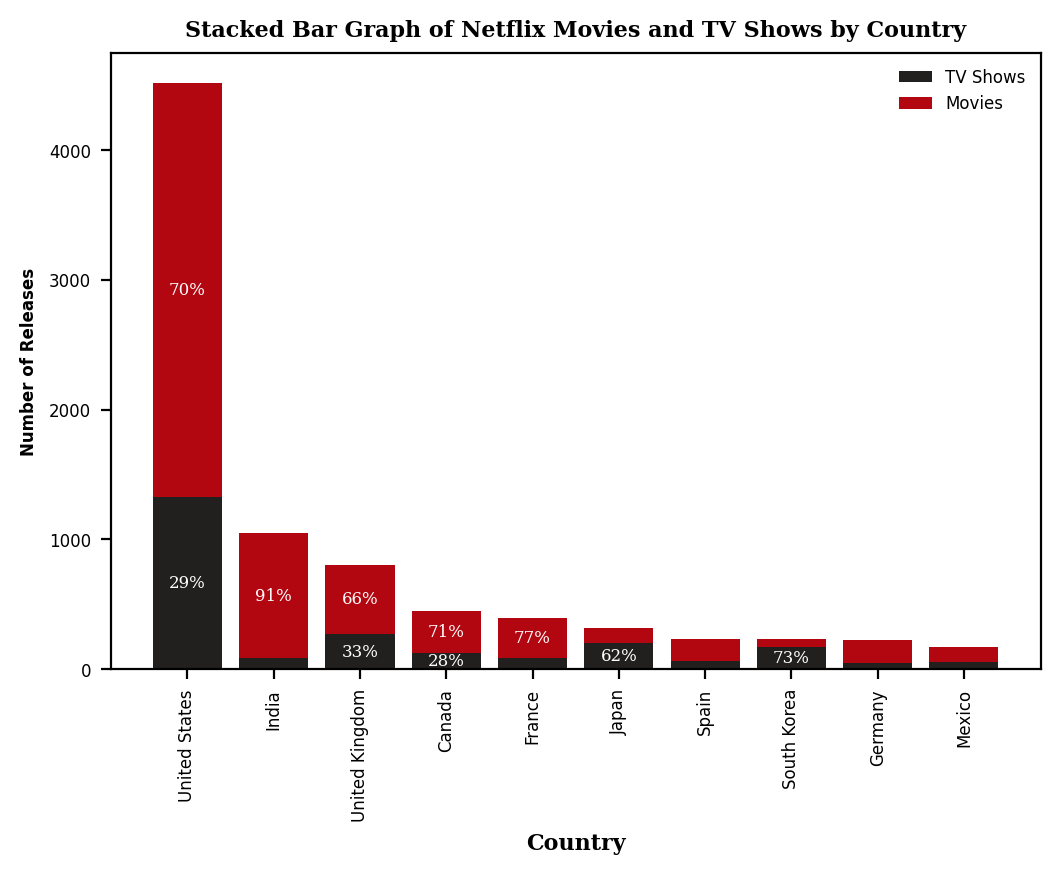

In [67]:
# Plotting the stacked bar graph
fig, ax = plt.subplots(figsize=(6, 4))

# Plotting the bars for Movies and TV Shows
tv_show_bars = ax.bar(netflix_countries.index, netflix_countries['TV Show'], color='#221f1f', label='TV Shows')
movie_bars = ax.bar(netflix_countries.index, netflix_countries['Movie'], bottom=netflix_countries['TV Show'], color='#b20710', label='Movies')
# Total count for percentage annotation
total_count_by_country = netflix_countries['Total'].values

# Annotating the Movie bars
for i, bar in enumerate(movie_bars):
    if bar.get_height() > 300:
        y_height = bar.get_height()
        ax.annotate(f'{int(y_height / total_count_by_country[i] * 100)}%',
                    xy=(bar.get_x() + bar.get_width() / 2, tv_show_bars[i].get_height() + (y_height / 2)),
                    ha='center', va='center', fontsize=6, color='white', fontfamily='serif')

# Annotating the TV Show bars
for i, bar in enumerate(tv_show_bars):
    if bar.get_height() > 100:
        y_height = bar.get_height()
        ax.annotate(f'{int(y_height / total_count_by_country[i] * 100)}%',
                    xy=(bar.get_x() + bar.get_width() / 2, y_height / 2),
                    ha='center', va='center', fontsize=6, color='white', fontfamily='serif')

# Customizing the plot
ax.set_title('Stacked Bar Graph of Netflix Movies and TV Shows by Country', fontsize=8, fontweight='bold', fontfamily='serif')
ax.set_xlabel('Country', fontsize=8, fontfamily='serif', fontweight='bold')
ax.set_ylabel('Number of Releases', fontsize=6, fontweight='bold')
ax.legend(loc='upper right', frameon=False, fontsize=6)

# Use tick_params to set font properties for ticks
ax.set_xticks(netflix_countries.index)
ax.tick_params(axis='x', labelsize=6, rotation=90)  # Rotate x-axis labels for better visibility
ax.tick_params(axis='y', labelsize=6)


plt.show()

--
# Insight:

The most prolific content producers for Netflix are predominantly from the USA, followed by India and the UK, which lag significantly behind.

It is logical for the USA to lead in content production, considering that Netflix is a US-based company.

Interestingly, Netflix's content in India consists almost entirely of Movies.

Bollywood is a significant industry, and its primary focus is on Movies rather than TV Shows.

In contrast, South Korean Netflix is predominantly comprised of TV Shows.

The fundamental reasons for this disparity in content likely stem from market research conducted by Netflix.

--

---
#Recommendations:
Expand Regional Content: Considering the USA's dominance in content production, Netflix should increase its investment in regional content in India and the UK to enhance its offerings and better engage local audiences.

Focus on Bollywood: Given the significance of Bollywood in India, Netflix should bolster its investment in Indian films and collaborate with more local filmmakers to create exclusive content that resonates with Indian viewers.

Director and Actor Collaboration: Facilitate collaborations between top directors and actors identified in your analysis to produce high-quality content. This could involve developing limited series or films that feature successful pairings.

Promote TV Show Production in India: Encourage the creation of more TV shows in India to diversify content offerings.

Address the Decline in Movie Count: There has been a noticeable decrease in the number of movies since 2019, and it is crucial to address this issue.

Strategic Release Timing: It would be beneficial to schedule TV show releases in January, February, and November. For movies, the optimal months for release are February, May, and August.

Combat the Downtrend in Total Content: The significant decrease in overall content released since 2019 calls for effective measures to promote creators and incentivize the production of more content, including attractive offers.

---

In [68]:
# End